In [ ]:
# 1. Please create a pandas DataFrame object from a dictionary which 
#    has some strings as keys and lists as values.
#    The lists should contain value of one of three types:
#    float, int oraz string (categorical).
#    Every list except of the last should contain NaN values in it.
#    The last list should contain labels (two values only, like
#    E and N). Please obtain at least five columns of the 
#    inputs and a few tens of rows.
# 2. Perfrom cleaning of the data. Remove possible columns
#    containing a single value, remove duplicate rows.
#    Use SimpleImputer to fill the missing (i.e. NaN) values
#    for both numerical and categorical columns.
# 3. Perform classification of the data into E and N using
#    at least two classifiers.
# 4. Use the confusion matrix plots to illustrate the results.

In [ ]:
import numpy as np
import numpy.random as npr

In [ ]:
npr.rand(5)

array([0.86594832, 0.50485643, 0.88450347, 0.04935771, 0.63730237])

In [ ]:
wilanow = {'table':npr.rand(50), 'chair': npr.rand(50), 'desk':npr.choice(['E', 'N'], size=50)}

In [ ]:
wilanow['table'][26] = np.NaN
wilanow['table'][2] = np.NaN
wilanow['chair'][3] = np.NaN
wilanow['chair'][7] = np.NaN
wilanow['desk'][5] = np.NaN
wilanow['desk'][15] = np.NaN

In [ ]:
wilanow['table']

array([0.55025506, 0.02945801,        nan, 0.03856402, 0.25067448,
       0.57485958, 0.39499799, 0.02224235, 0.48750406, 0.2050643 ,
       0.67758116, 0.91052584, 0.68173696, 0.6469258 , 0.31851035,
       0.95011681, 0.44302964, 0.25227464, 0.63991087, 0.95533441,
       0.50594814, 0.90479922, 0.71986175, 0.94535505, 0.51695885,
       0.25970034,        nan, 0.86054006, 0.90488385, 0.40183998,
       0.77056823, 0.21016107, 0.30100637, 0.80009486, 0.02163101,
       0.67550656, 0.99283929, 0.77872824, 0.88773342, 0.97523371,
       0.04329557, 0.87185332, 0.710765  , 0.79193019, 0.53217654,
       0.60689011, 0.93419873, 0.61133106, 0.60786295, 0.29660408])

In [ ]:
import pandas as pd
garden = pd.DataFrame(wilanow)

In [ ]:
garden.head(10)

,table,chair,desk
0,0.550255,0.810369,N
1,0.029458,0.962236,E
2,NaN,0.149651,E
3,0.038564,NaN,N
4,0.250674,0.784460,N
5,0.574860,0.389460,n
6,0.394998,0.535013,N
7,0.022242,NaN,E
8,0.487504,0.416071,E
9,0.205064,0.874727,E


In [ ]:
#
garden_numerical = garden[["table", "chair"]]
garden_categorical = garden[["desk"]]

In [ ]:
garden_categorical.head(10)

,desk
0,N
1,E
2,E
3,N
4,N
5,n
6,N
7,E
8,E
9,E


In [ ]:
garden_numerical.head(10)

,table,chair
0,0.550255,0.810369
1,0.029458,0.962236
2,NaN,0.149651
3,0.038564,NaN
4,0.250674,0.784460
5,0.574860,0.389460
6,0.394998,0.535013
7,0.022242,NaN
8,0.487504,0.416071
9,0.205064,0.874727


In [ ]:
from sklearn.impute import SimpleImputer

si  = SimpleImputer(missing_values= np.nan, strategy= 'mean')
garden_numerical = pd.DataFrame(si.fit_transform(garden_numerical))
garden_numerical.head(10)

,0,1
0,0.550255,0.810369
1,0.029458,0.962236
2,0.572289,0.149651
3,0.038564,0.521078
4,0.250674,0.784460
5,0.574860,0.389460
6,0.394998,0.535013
7,0.022242,0.521078
8,0.487504,0.416071
9,0.205064,0.874727


In [ ]:
garden_numerical = garden_numerical.rename(columns={0: "table", 1: "chair"})
garden_numerical.head(10)

,table,chair
0,0.550255,0.810369
1,0.029458,0.962236
2,0.572289,0.149651
3,0.038564,0.521078
4,0.250674,0.784460
5,0.574860,0.389460
6,0.394998,0.535013
7,0.022242,0.521078
8,0.487504,0.416071
9,0.205064,0.874727


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
garden_categorical_enc = pd.DataFrame(labelencoder.fit_transform(garden_categorical))


garden_categorical_enc.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0
0,1
1,0
2,0
3,1
4,1
5,2
6,1
7,0
8,0
9,0


In [ ]:
garden_categorical_enc = garden_categorical_enc.rename(columns={0: "desk"})
garden_categorical_enc.head(10)

,desk
0,1
1,0
2,0
3,1
4,1
5,2
6,1
7,0
8,0
9,0


In [ ]:
data_merge = pd.concat([garden_numerical, garden_categorical_enc], axis = 1,)
data_merge.head(10)

,table,chair,desk
0,0.550255,0.810369,1
1,0.029458,0.962236,0
2,0.572289,0.149651,0
3,0.038564,0.521078,1
4,0.250674,0.784460,1
5,0.574860,0.389460,2
6,0.394998,0.535013,1
7,0.022242,0.521078,0
8,0.487504,0.416071,0
9,0.205064,0.874727,0


In [ ]:
data_merge.shape[0] #rows

50

In [ ]:
garden_new = data_merge[data_merge.desk !=2]
garden_new.head(10)

,table,chair,desk
0,0.550255,0.810369,1
1,0.029458,0.962236,0
2,0.572289,0.149651,0
3,0.038564,0.521078,1
4,0.250674,0.784460,1
6,0.394998,0.535013,1
7,0.022242,0.521078,0
8,0.487504,0.416071,0
9,0.205064,0.874727,0
10,0.677581,0.505259,0


In [ ]:
garden_new.shape[0]

48

In [ ]:
garden_new = pd.DataFrame.drop_duplicates(garden_new)

garden_new.shape[0]

48

In [ ]:
data = garden_new

In [ ]:
data.shape[0]

48

In [ ]:
data.head(10)

,table,chair,desk
0,0.550255,0.810369,1
1,0.029458,0.962236,0
2,0.572289,0.149651,0
3,0.038564,0.521078,1
4,0.250674,0.784460,1
6,0.394998,0.535013,1
7,0.022242,0.521078,0
8,0.487504,0.416071,0
9,0.205064,0.874727,0
10,0.677581,0.505259,0


In [ ]:
X, y = data.drop(['desk'], axis=1), data[['desk']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

In [ ]:
X_train.shape, X_test.shape

((32, 2), (16, 2))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [ ]:
X_test

,table,chair
35,0.675507,0.158139
2,0.572289,0.149651
8,0.487504,0.416071
27,0.860540,0.484575
23,0.945355,0.381560
14,0.318510,0.125736
11,0.910526,0.582747
40,0.043296,0.265084
13,0.646926,0.070127
20,0.505948,0.439479


In [ ]:
ypred = rfc.predict(X_test)

In [ ]:
ypred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, ypred)
print(cf_matrix)

[[2 7]
 [4 3]]


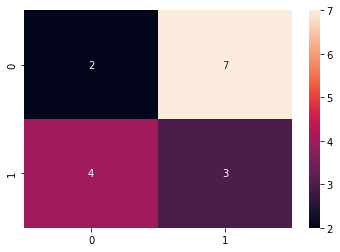

In [ ]:
sns.heatmap(cf_matrix, annot=True)